In [14]:
from matplotlib import pyplot as plt
from wsi import WSIDataset
from pathlib import Path
import random
import numpy as np
# from augmentations import Augmentations
# from masking import MaskingGenerator
import torch

from monai.apps.pathology.transforms.stain import NormalizeHEStains
from torchvision.transforms import ToTensor

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
data_path = "/home/espenbfo/datasets/GDC"
dataset = WSIDataset(Path(data_path), None, transform=)

In [18]:
path = dataset.files[1]
wsi = dataset.reader.read(path.as_posix())
highest_level = dataset.reader.get_level_count(wsi)-1
microns_at_highest_level = dataset.reader.get_mpp(wsi, highest_level)
data = dataset.reader.get_data(wsi, level=highest_level)


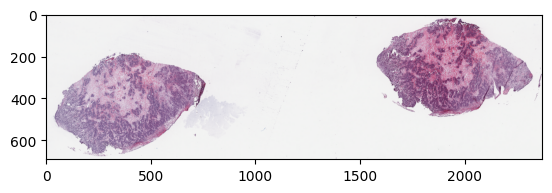

In [25]:
plt.imshow(np.moveaxis(data[0], 0, 2))

{'backend': 'cucim', 'original_channel_dim': 0, 'spatial_shape': array([240, 240]), 'count': 1, 'path': '/home/espenbfo/datasets/GDC/81d801bd-8b12-4565-8212-f6eac6fd04fe/TCGA-A8-A09R-01A-01-BS1.e7c57b70-0da9-4500-adf7-e58735f6aac7.svs', 'location': array([30000, 30000]), 'size': array([240, 240]), 'level': 1}
((256, 256), (256, 256), (256, 256), (256, 256))


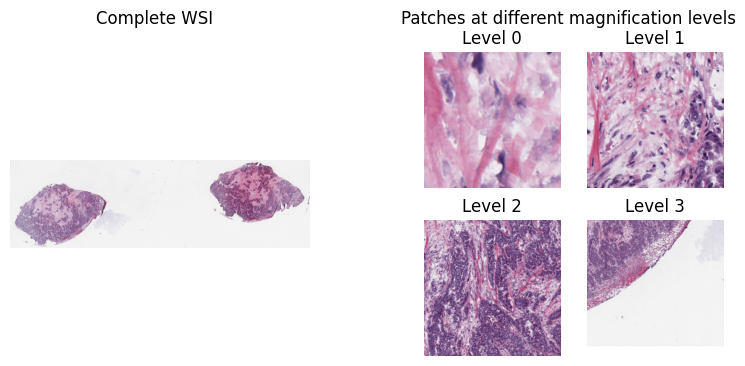

In [28]:
patch = dataset.reader.get_data(wsi, location=(30000, 30000), size=(240, 240), level=1)
#print(help(dataset.reader))
print(patch[1])
print(wsi.resolutions["level_tile_sizes"])
#plt.imshow(np.moveaxis(patch[0], 0, 2))

fig = plt.figure(figsize=(8,4))
subfigs = fig.subfigures(1, 2, wspace=0.07)

axes = subfigs[0].subplots(1, 1)
subfigs[0].suptitle("Complete WSI")
axes.axis("off")

axes.imshow(np.moveaxis(data[0], 0, 2))


axes = subfigs[1].subplots(2, 2)
subfigs[1].suptitle("Patches at different magnification levels")

for i in range(4):
    patch = dataset.reader.get_data(wsi, location=(30000, 30000), size=(240, 240), level=i)
    axes[i//2, i%2].imshow(np.moveaxis(patch[0], 0, 2))
    axes[i//2, i%2].set_title(f"Level {i}")
    axes[i//2, i%2].axis("off")

In [ ]:
location = (.28, 0.5)
n = 4
scale_factor = 0.7

fig, axes = plt.subplots(n, n, figsize=(16,17))

for i in range(n):
    for j in range(n):
        scale = 15000*(scale_factor**(i*n+j))
        patch = dataset.get_patch_at_location(wsi, (0.32, 0.3), scale, 224, location_is_center=True)
        height = 14000
        width = 18900
        axes[i][j].imshow(patch, extent=[
            width*0.32-scale/2, width*0.32+scale/2,
            height*0.3+scale/2, height*0.3-scale/2
        ])
        axes[i][j].set_xlabel("X position (µm)")
        axes[i][j].set_ylabel("Y position (µm)")
        #axes[i][j].axis("off")
        axes[i][j].set_title(f"Scale: {scale:.0f} µm")

In [ ]:
import time
iterations = 100
dataset.use_preprocessed_thumbnails = True
results = np.zeros((iterations))

for i in range(iterations):
    path = dataset.files[i]
    wsi = dataset.reader.read(path.as_posix())
    start_time = time.time()
    #valid_patches = dataset.extract_valid_patches(wsi, 1000, path, 0.1)
    patch = dataset.random_valid_patch(path, 200, 1500)
    delta_time = time.time()-start_time
    results[i] = delta_time
print(results.mean())
plt.imshow(patch)


In [ ]:
patch = dataset.random_valid_patch(path, 200, 1500)
print(patch.min(), patch.max())
plt.imshow(patch)

In [30]:
patch = dataset[0]
plt.imshow(patch)

TypeError: 'NoneType' object is not callable

In [ ]:
augmentation = Augmentations()
augmented = augmentation(patch)

fig, axes = plt.subplots(1, augmentation.global_crop_number, figsize=(15,5))

for index, global_crop in enumerate(augmented["global_crops"]):
    axes[index].imshow(np.moveaxis(global_crop.numpy(), 0, 2))

fig, axes = plt.subplots(1, augmentation.local_crops_number, figsize=(15,5))
for index, local_crop in enumerate(augmented["local_crops"]):
    axes[index].imshow(np.moveaxis(local_crop.numpy(), 0, 2))

In [ ]:
mask_generator = MaskingGenerator((14, 14), 14*14//2)
image = torch.ones((14,14))
mask = mask_generator(14*2)
plt.imshow(mask)

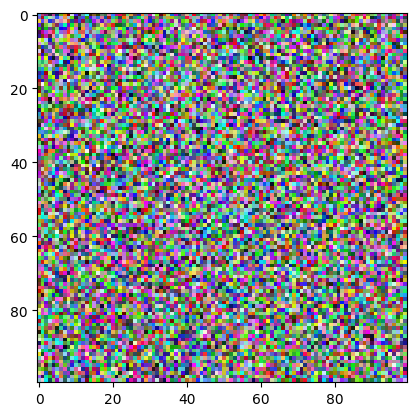

In [10]:
x = np.random.random((100, 100, 3))

plt.imshow(x)

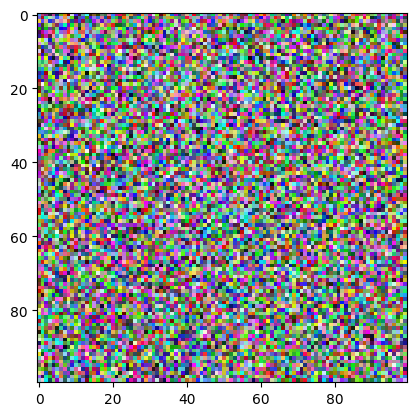

In [13]:
norm = NormalizeHEStains()
y = norm(x)

plt.imshow(x)